## Predicting Survival on the Titanic using Logistic Regression

Building a logistic regression to predict survival on the titanic.   

In my model ,I going to use the independent variables 'Sex', 'Age', 'Pclass', 'Ticket' ,'Parch','SibSp' and 'Embarked' to predict the dependent variable "Survived".  

Firstly When I used only variables 'Sex', 'Age', 'Pclass', 'Embarked' to predict 'Survived ' I got AUC of 0.79,with Logistic Accuracy of 0.80
Thn decided to use one more variable ,So Lets start using an Extra variable Cabin,it gave Logistic accuracy of 0.76 and AUC of 0.76,So it is not perfect model
So next we can try with Ticket variable along with Parch and SibSp features ,Got Logistic accuracy of 0.85 and AUC of 0.84
So this is the best model we can consider

1.Data Prep
Let me start with some data prep to get data ready to be used in a model

In [29]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [30]:
df=pd.read_csv("D:\UIS-LEARN\Spring 2016/titanicdataset/train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [31]:
#here are all the column names
df.columns

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [93]:
#I'm going to create a new dataframe and put 8 variables I'm going to be using into it.
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['pclass']=df['Pclass']
X['embarked']=df['Embarked']
X['parch']=df['Parch']
X['sibsp']=df['SibSp']
X['ticket']=df['Ticket']
X['survived'] = df['Survived']


In [94]:
#I'm going to drop missing values.   That's probably NOT the best strategy, but it's usually good to start simple and 
#build complexity as you go.
X = X.dropna(axis=0)

In [95]:
#survived will be my dependent variable, y.   I'll assign it to y and remove it from X
y = X['survived']
X = X.drop(['survived'], axis=1)

In [96]:
# We need to handle Sex such that it's categorical, for logistic regression.
# Currently it's a string
#We can use pandas get_dummies to implement one hot encoding.
pd.get_dummies(X.sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
6,0,1
7,0,1
8,1,0
9,1,0
10,1,0


In [97]:
#it's important to drop one category
#Otherwise we'll have two perfectly collinear variables.
X['sex'] = pd.get_dummies(X.sex)['female']

In [98]:
#Simiral to 'Sex' variable 'pclass' is also categorical variable with 1, 2, 3 as three diffrent classes.
#So implement one hot encoding
pd.get_dummies(X.pclass, prefix='pclass')

,pclass_1,pclass_2,pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0
10,0,0,1


In [99]:
#We will join our original dataset with new columns that we got from one hot encoding.
X = X.join(pd.get_dummies(df.Pclass, prefix='pclass'))

In [100]:
#it's important to drop one category
X = X.drop(['pclass_1', 'pclass'], axis=1)

In [101]:
#Simiral to 'Sex' variable 'Embarked' is also categorical variable with C, Q, S as three diffrent cities.
#So implement one hot encoding
pd.get_dummies(X.embarked, prefix='embarked')

,embarked_C,embarked_Q,embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0
10,0,0,1


In [102]:
#We will join our original dataset with new columns that we got from one hot encoding.
X = X.join(pd.get_dummies(df.Embarked, prefix='embarked'))

In [103]:
#it's important to drop one category
X = X.drop(['embarked_C', 'embarked'], axis=1)

In [104]:
#We will join our original dataset with new columns that we got from one hot encoding.
X = X.join(pd.get_dummies(df.Ticket, prefix='ticket'))


In [105]:
X.head()

,sex,age,parch,sibsp,ticket,pclass_2,pclass_3,embarked_Q,embarked_S,ticket_110152,...,ticket_STON/O2. 3101290,ticket_SW/PP 751,ticket_W./C. 14258,ticket_W./C. 14263,ticket_W./C. 6607,ticket_W./C. 6608,ticket_W./C. 6609,ticket_W.E.P. 5734,ticket_W/C 14208,ticket_WE/P 5735
0,0,22,0,1,A/5 21171,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,38,0,1,PC 17599,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,26,0,0,STON/O2. 3101282,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,35,0,1,113803,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,35,0,0,373450,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
#it's important to drop one category
X = X.drop(['ticket_349215', 'ticket'], axis=1)

In [107]:
#scaling our features.
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [108]:
#build test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Creation
At this point I have a test and train set defined.  I will use train to train my model and test to see how accurate the model is.

There's one problem with that though.   Lets say my model is right 70% of the time.   Is that good?  Maybe?   

I'm going to build a simple 'base rate' model to compare my logistic model to, so we can see if our logistic model is useful or not.  

Then, I'll build my logistic model.


####Base Rate Model
For my baserate model, I'm going to predict that everyone dies.

In [109]:
#This function looks for females in the test set and returns 1, survived, otherwise it returns 0
def base_rate_model(X):
    y = np.zeros(X.shape[0])
    return y

In [110]:
#how accurate is my base rate model?
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print "Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate)

Base rate accuracy is 0.56


<B>So, our base model is 56% correct, lets see if logistic can beat it.

In [111]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [112]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.85


### Model Comparison

Our base model wasn't very good, but it looked better than it was because of class imbalance.  There are many more 0s than 1s in our dataset, so if we just guess 0 we can 'cheat.'

A better metric for binary classifer comparisons is AUC or area under the curve. 

Closely related is [precision and recall](http://scikit-learn.org/stable/auto_examples/plot_precision_recall.html).

Precision is the fraction of correctly identified examples of a class (ratio of true positives to all positives).

Recall is the fraction of observastions classified in that class that was correctly classified.

In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [125]:

print "\n\n---Logistic Model---"
#logistic AUC
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )



---Logistic Model---
Logistic AUC = 0.84
             precision    recall  f1-score   support

          0       0.85      0.89      0.87        80
          1       0.85      0.79      0.82        63

avg / total       0.85      0.85      0.85       143



In [119]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

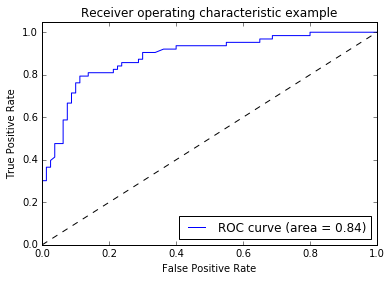

In [120]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()